# Task 3
 Systematic comparison between direct A* and velocity-based A*
we analyze the computation time concerning increasing grid size and escalating obstacle coverage of the map.

In [1]:
import matplotlib.pyplot as plt
import copy
import time
import pandas as pd
from typing import *
from matplotlib.patches import FancyArrow
import numpy as np
import math

# Design Map of size 10x10 with 3 levels of obstacle coverage

In [2]:
FREE = 0
OCCUPIED = 100

low_10 = [[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 0],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  
            [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [0, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]

medium_10 = [[1, 0, 1, 0, 0, 0, 0, 1, 0, 0],  
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],  
            [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],  
            [0, 0, 0, 0, 0, 1, 1, 1, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],  
            [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],  
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],  
            [0, 0, 1, 0, 0, 0, 0, 1, 0, 1]]


high_10 = [[1, 0, 1, 0, 0, 0, 0, 1, 0, 0],  
            [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],  
            [1, 0, 1, 1, 0, 1, 0, 1, 1, 1],  
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],  
            [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 1, 0, 0, 1, 1, 1],  
            [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],  
            [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],  
            [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],  
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

# Design Map of size 20x20 with 3 levels of obstacle coverage

In [3]:
low_20 = [
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
]
medium_20 = [
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
]

high_20= [
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
    [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
]

# Design Map of size 30x30 with 3 levels of obstacle coverage

Sample Map with obstacles


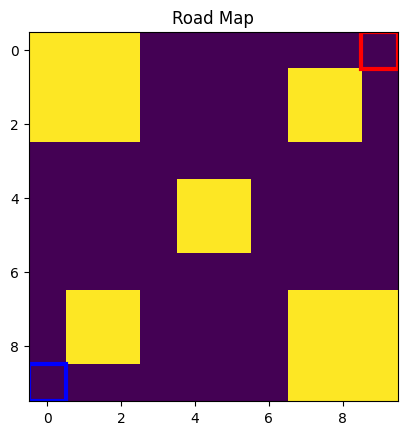

In [4]:

low_30 = [
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
]

medium_30 = [
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
]

high_30 = [
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
]
map_list = {
    '10x10_Low': low_10,
    '10x10_Medium': medium_10,
    '10x10_High': high_10,
    '20x20_Low': low_20,
    '20x20_Medium': medium_20,
    '20x20_High': high_20,
    '30x30_Low': low_30,
    '30x30_Medium': medium_30,
    '30x30_High': high_30
}
variable_map = [(name, value) for name, value in map_list.items()]


# Get the name of the variable by its value (grid map) for the TABLE
def get_variable_name(value):
    for name, val in variable_map:
        if val == value:
            return name
    return None


grid_map_name, grid_map_value = next(iter(map_list.items()))
grid_map = [[cell* OCCUPIED for cell in row] for row in grid_map_value]  #Sample Map representation
# print(len(grid_map))
print("Sample Map with obstacles")

plt.imshow(grid_map)
plt.title("Road Map")
if (len(grid_map)==10):
        start = (9,0)
        goal = (0,9)
if (len(grid_map)==20):
        start = (19,0)
        goal = (0,19)
if (len(grid_map)==30):
        start = (29,0)
        goal = (0,29)


rect = plt.Rectangle((start[1]-.5, start[0]-.5), 1,1, fill=False, color="blue", linewidth=3)
plt.gca().add_patch(rect)

rect = plt.Rectangle((goal[1]-.5, goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
plt.gca().add_patch(rect)

# Helping Functions

In [5]:

from IPython.display import clear_output

print_message=True

for i in range(50):
    clear_output(wait=False)

def cal_heuristic(pos: tuple, goal: tuple) -> float:
    return ((pos[0]-goal[0])**2 + (pos[1]-goal[1])**2)**0.5



In [6]:
def is_line_intersect(grid_map, x1, y1, x2, y2):
    # Bresenham's line algorithm
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    err = dx - dy

    while True:
        # Check if the current point lies within the grid boundaries
        if x1 >= 0 and x1 < len(grid_map) and y1 >= 0 and y1 < len(grid_map[0]):
            # If the current point is occupied (has a value of 1), return True
            if grid_map[x1][y1] == 100:
                return True

        # If both points have been reached, break the loop
        if x1 == x2 and y1 == y2:
            break
        
        # Calculate next point
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    # If none of the points on the line are occupied, return False
    return False


def is_valid(pos: tuple,grid_map: List[List[int]],cur: tuple=None) -> bool:
    """ given an index pair, eg. (6,4), check if it is inside the grid map and it is free """
    # if the pos is beyond the map, return false
    if pos[0]<0 or pos[1]<0 or pos[0]>len(grid_map)-1 or pos[1]>len(grid_map[0])-1:
        return False
    
    # if the pos is occupied, return false
    if grid_map[pos[0]][pos[1]] == OCCUPIED: 
        return False
    if cur:
        return not(is_line_intersect(grid_map,cur[0],cur[1],pos[0],pos[1]))
    return True


# Implementation of the Direct A* algorithm for single-agent path planning


In [7]:
class AStarPlanner():
    def __init__(self, grid_map):
        self.row = len(grid_map[1])
        self.col = len(grid_map[0])
        
        self.grid_map = copy.deepcopy(grid_map)
        
        self.possible_moves = [[1, 0], [0, 1], [-1, 0], [0, -1]]       
        
    def search(self, start, goal, heu_wgt=1):
        self.start, self.goal = start, goal

        # check if the given start and goal are valid
        if not is_valid(start, self.grid_map) or not is_valid(goal, self.grid_map):
            print("The start or the goal is not valid")
            return False
        
        self.explored = []
        self.unexplored = []        
        self.g_score = [[float('inf') for i in range(self.row)] for j in range(self.col)] #created and filled with infinity 
        self.f_score = [[float('inf') for i in range(self.row)] for j in range(self.col)]
        self.cost_visualization = copy.deepcopy(grid_map)
        self.track_back = {}
        
        self.unexplored.append(self.start)
        sorted_not_explored = [self.start]
        self.g_score[self.start[0]][self.start[1]] = 0
        self.track_back[self.start] = None
        
        while(self.unexplored):
            # STEP1: move to the position in the queue with minimal `f(n)`
            cur = sorted_not_explored[0]
            self.unexplored.remove(cur)
            self.explored.append(cur)
            
            # STEP2: check if the standing position is the goal
            # if the pos with min f is the goal then return
            # if not, add the pos to explored[] and remove it from unexplored[]
            if cur == goal:
                print("The goal has been found")
                return True
            
            # STEP3: determine the next possible positions
            next_possible_pos = (np.array(self.possible_moves) + np.array(cur))
            for pos in next_possible_pos:
                next_pos = tuple(pos)
                
                # if the next is not valid, continue
                if not is_valid(next_pos, self.grid_map):
                    continue

                # STEP4: store the possible positions into the queue
                # if the pos hasn't been evaluated,, 
                # then update the g_score, f_score, cost_visualization, and track_back
                if next_pos not in self.explored and next_pos not in self.unexplored:
                    self.unexplored.insert(0,next_pos)
                    self.g_score[next_pos[0]][next_pos[1]] = self.g_score[cur[0]][cur[1]]+1
                    self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal) #f=g+h
                    self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]] #copy of grid map also a matrix
                    self.track_back[next_pos] = cur
                
                # The pos has been evaluated, but the new g_score is lower then previous result. 
                # That means this is a shorter path to reach the pos
                # Update the g_score, f_score, cost_visualization, and track_back
                else:
                    g_score_tmp = self.g_score[cur[0]][cur[1]]+1
                    if g_score_tmp < self.g_score[next_pos[0]][next_pos[1]]:
                        self.g_score[next_pos[0]][next_pos[1]] = g_score_tmp
                        self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal)
                        self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]]
                        self.track_back[next_pos] = cur
            
            # sort unexplored[] based on their f value. Hint: use sorted() with lambda function as key.
            sorted_not_explored = sorted(self.unexplored, key=lambda pos: self.f_score[pos[0]][pos[1]], reverse=False)
            # if(print_message):
                # print('sorted_not_explored: ', sorted_not_explored)
            
        print("No valid path to the goal")
        return False

# Implementation of the Velocity based A* algorithm algorithm for single-agent path planning


In [8]:
class VelocityAStarPlanner():
    def __init__(self, grid_map):
        self.row = len(grid_map[1])
        self.col = len(grid_map[0])
        
        self.grid_map = copy.deepcopy(grid_map)
    
        self.velocity_range = [1,2,3]  # Sample velocity range

        self.angle_range = [0, 45, 90,135,-135,-90,-45,180]  # Sample angle range      
        self.possible_moves =[]
        for vel in self.velocity_range:
                for angle in self.angle_range:
                    dx=int(round(vel*math.cos(math.radians(angle)))) 
                    dy=int(round(vel*math.sin(math.radians(angle))))
                    self.possible_moves.append([dx,dy])
        
        # print("posible move =",self.possible_moves)
        
    def search(self, start, goal, heu_wgt=1):
        self.start, self.goal = start, goal

        # check if the given start and goal are valid
        if not is_valid(start, self.grid_map) or not is_valid(goal, self.grid_map):
            print("The start or the goal is not valid")
            return False
        
        self.explored = []
        self.unexplored = []        
        self.g_score = [[float('inf') for i in range(self.row)] for j in range(self.col)] #created and filled with infinity 
        self.f_score = [[float('inf') for i in range(self.row)] for j in range(self.col)]
        self.cost_visualization = copy.deepcopy(grid_map)
        self.track_back = {}
        
        self.unexplored.append(self.start)
        sorted_not_explored = [self.start]
        self.g_score[self.start[0]][self.start[1]] = 0
        self.track_back[self.start] = None
        
        while(self.unexplored):
            # STEP1: move to the position in the queue with minimal `f(n)`
            cur = sorted_not_explored[0]
            self.unexplored.remove(cur)
            self.explored.append(cur)
            
            # STEP2: check if the standing position is the goal
            # if the pos with min f is the goal then return
            # if not, add the pos to explored[] and remove it from unexplored[]
            if cur == goal:
                print("The goal has been found")
                return True
            
            # STEP3: determine the next possible positions
            next_possible_pos = (np.array(self.possible_moves) + np.array(cur))
            for pos in next_possible_pos:
                next_pos = tuple(pos)
                
                # if the next is not valid, continue
                if not is_valid(next_pos, self.grid_map,cur):
                    continue

                # STEP4: store the possible positions into the queue
                # if the pos hasn't been evaluated,, 
                # then update the g_score, f_score, cost_visualization, and track_back
                if next_pos not in self.explored and next_pos not in self.unexplored:
                    self.unexplored.insert(0,next_pos)
                    self.g_score[next_pos[0]][next_pos[1]] = self.g_score[cur[0]][cur[1]]+1
                    self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal) #f=g+h
                    self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]] #copy of grid map also a matrix
                    self.track_back[next_pos] = cur
                
                # The pos has been evaluated, but the new g_score is lower then previous result. 
                # That means this is a shorter path to reach the pos
                # Update the g_score, f_score, cost_visualization, and track_back
                else:
                    g_score_tmp = self.g_score[cur[0]][cur[1]]+1
                    if g_score_tmp < self.g_score[next_pos[0]][next_pos[1]]:
                        self.g_score[next_pos[0]][next_pos[1]] = g_score_tmp
                        self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal)
                        self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]]
                        self.track_back[next_pos] = cur
            
            # sort unexplored[] based on their f value. Hint: use sorted() with lambda function as key.
            sorted_not_explored = sorted(self.unexplored, key=lambda pos: self.f_score[pos[0]][pos[1]], reverse=False)

            # if(print_message):
            #     print('sorted_not_explored: ', sorted_not_explored)
                
        print("No valid path to the goal")
        return False

# Plotting paths and calculating computation time for Direct A* for each grid maps


The goal has been found


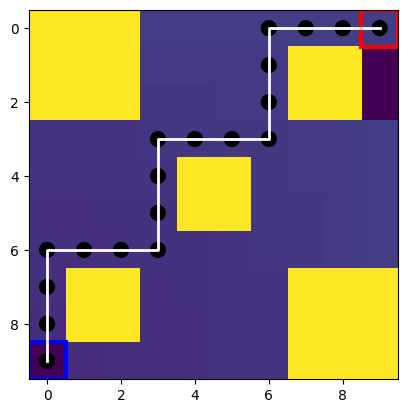

The goal has been found
Time taken: 0.0013707000180147588 seconds
The goal has been found


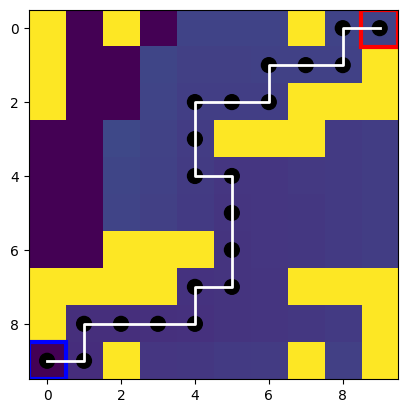

The goal has been found
Time taken: 0.0011112999636679888 seconds
The goal has been found


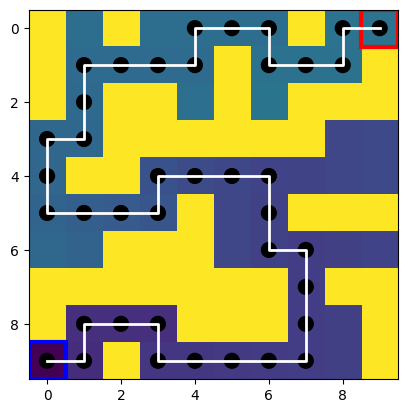

The goal has been found
Time taken: 0.0014501000405289233 seconds
The goal has been found


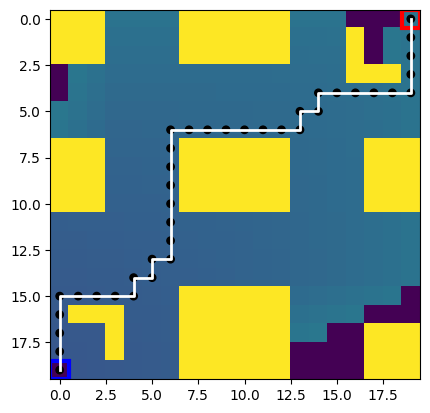

The goal has been found
Time taken: 0.0075505999848246574 seconds
The goal has been found


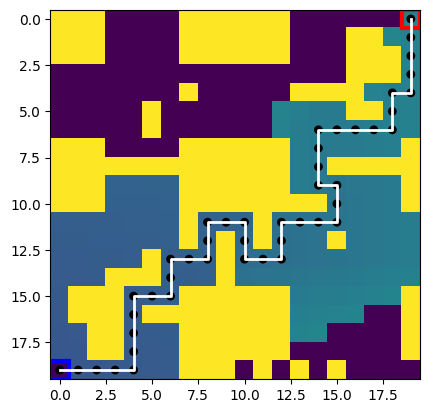

The goal has been found
Time taken: 0.0036168000078760087 seconds
The goal has been found


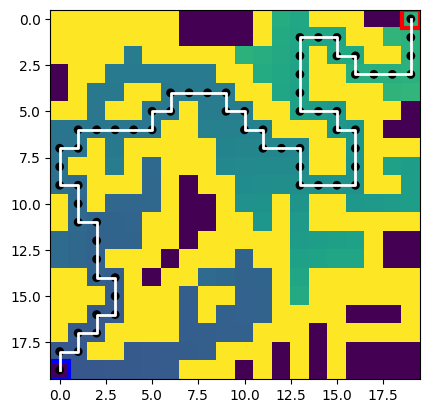

The goal has been found
Time taken: 0.004225799988489598 seconds
The goal has been found


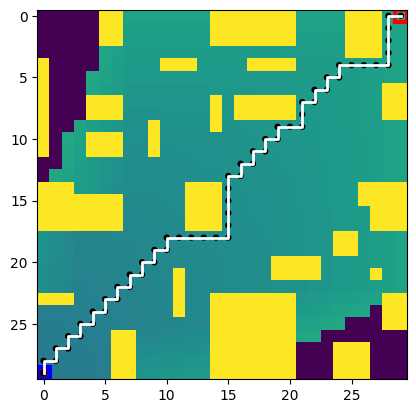

The goal has been found
Time taken: 0.025739500008057803 seconds
The goal has been found


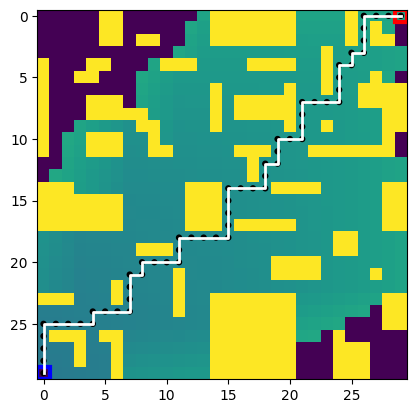

The goal has been found
Time taken: 0.021626300003845245 seconds
The goal has been found


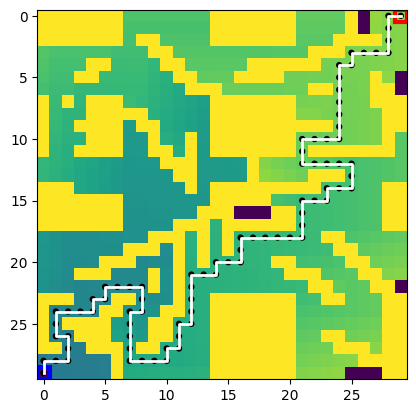

The goal has been found
Time taken: 0.017148600018117577 seconds


<Figure size 640x480 with 0 Axes>

In [9]:
results1=[] # Defined a list to store grid maps and elapsed times
grid_maps = []
# for i in range(len(map_list)):
for name, grid_map_value in variable_map:
    grid_map = [[cell * OCCUPIED for cell in row] for row in grid_map_value]
    grid_maps.append(grid_map)
    a_star_planner = AStarPlanner(grid_map) # Direct A*
    if (len(grid_map)==10):
        start = (9,0)
        goal = (0,9)
    if (len(grid_map)==20):
        start = (19,0)
        goal = (0,19)
    if (len(grid_map)==30):
        start = (29,0)
        goal = (0,29)
    
    goal_found = a_star_planner.search(start, goal, heu_wgt=1)
    
    if goal_found:
        plt.imshow(a_star_planner.cost_visualization)

        rect = plt.Rectangle((a_star_planner.start[1] - .5, a_star_planner.start[0] - .5), 1, 1, fill=False,
                             color="blue", linewidth=3)
        plt.gca().add_patch(rect)

        rect = plt.Rectangle((a_star_planner.goal[1] - .5, a_star_planner.goal[0] - .5), 1, 1, fill=False,
                             color="red", linewidth=3)
        plt.gca().add_patch(rect)

        cur = a_star_planner.goal
        path = []
        while cur is not None:
            path.append(cur)
            cur = a_star_planner.track_back[cur]
        path.reverse()

        for footprint in path:
            crle = plt.Circle((footprint[1], footprint[0]), 0.2, fill=True, color="black", linewidth=1)
            plt.gca().add_patch(crle)

        # Draw line connecting path points
        x = [point[1] for point in path]
        y = [point[0] for point in path]
        plt.plot(x, y, color='white', linewidth=2)

    # Show or save the plot as needed
    plt.show()  

    # Clear the current figure to avoid overlapping plots
    plt.clf()  
    
    

    print_message=False
    start_time = time.perf_counter()
    a_star_planner.search(start, goal)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    print("Time taken:", elapsed_time, "seconds")

    
    #To store the time and corresponding Map for Table
    results1.append({'Grid Map': get_variable_name(grid_map_value), 'Elapsed Time': elapsed_time})

# Tabulating computed time for the Direct A* algorithm.


In [10]:
# Create a DataFrame from the results list
df1 = pd.DataFrame(results1)

# Rename columns
df1.columns = ['Grid_Map', 'Time taken for Direct A*']

# Display the DataFrame
print(df1)

       Grid_Map  Time taken for Direct A*
0     10x10_Low                  0.001371
1  10x10_Medium                  0.001111
2    10x10_High                  0.001450
3     20x20_Low                  0.007551
4  20x20_Medium                  0.003617
5    20x20_High                  0.004226
6     30x30_Low                  0.025740
7  30x30_Medium                  0.021626
8    30x30_High                  0.017149


# Plotting paths and calculating computation time for velocity-based A* for each grid map

The goal has been found


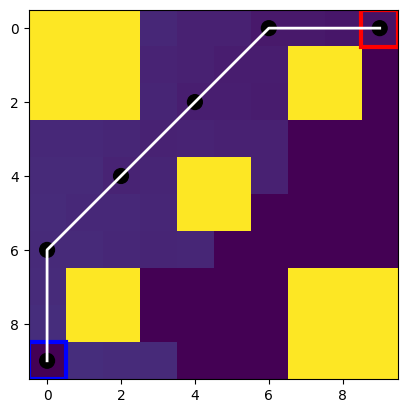

The goal has been found
Time taken: 0.0007217000238597393 seconds
The goal has been found


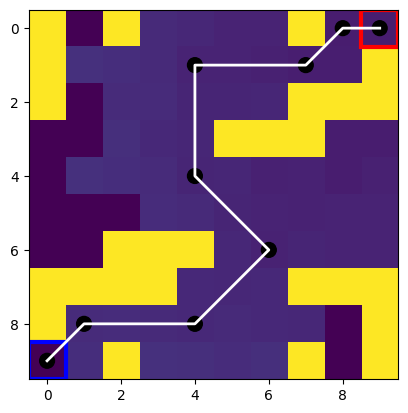

The goal has been found
Time taken: 0.0021397999953478575 seconds
The goal has been found


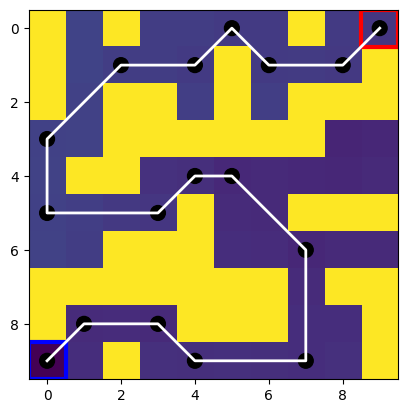

The goal has been found
Time taken: 0.004849399963859469 seconds
The goal has been found


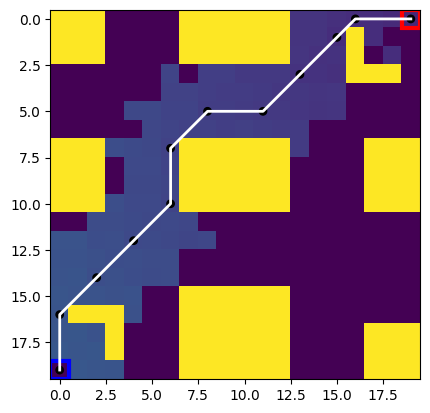

The goal has been found
Time taken: 0.0021138000302016735 seconds
The goal has been found


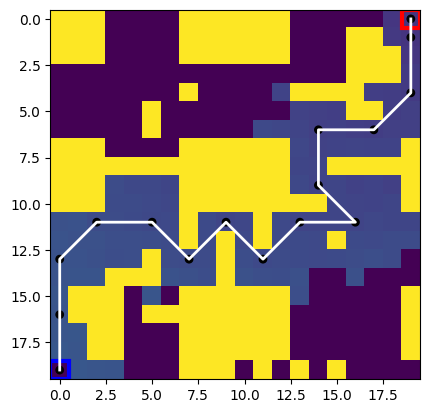

The goal has been found
Time taken: 0.004003000038210303 seconds
The goal has been found


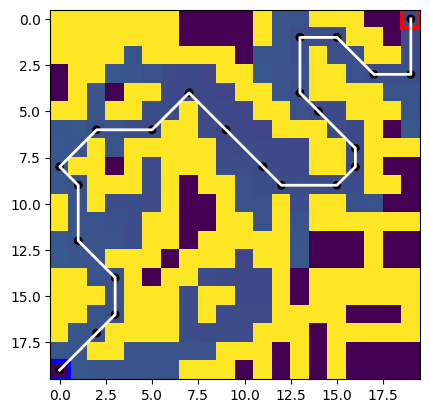

The goal has been found
Time taken: 0.008991300011985004 seconds
The goal has been found


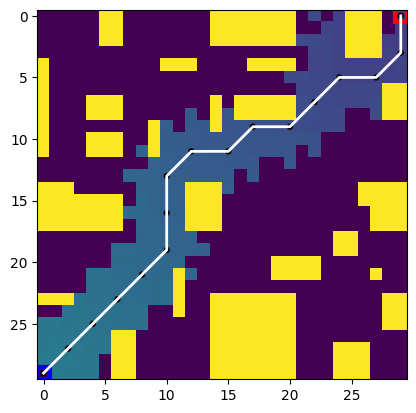

The goal has been found
Time taken: 0.004177100025117397 seconds
The goal has been found


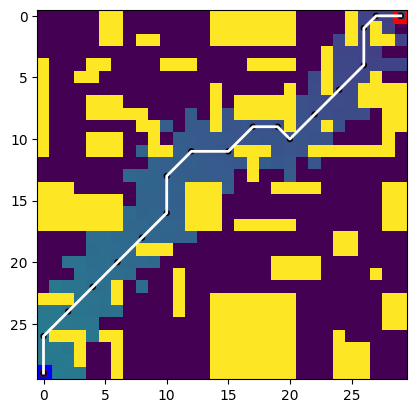

The goal has been found
Time taken: 0.003739899955689907 seconds
The goal has been found


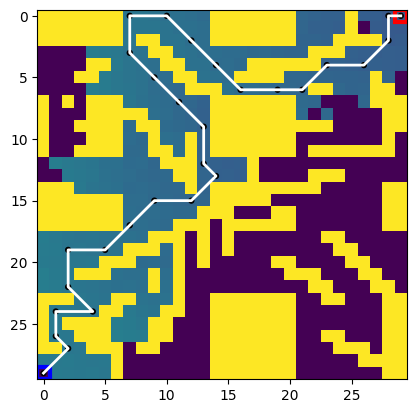

The goal has been found
Time taken: 0.019618900027126074 seconds


<Figure size 640x480 with 0 Axes>

In [11]:

results = [] # Defined a list to store grid maps and elapsed times
grid_maps = []
for name, grid_map_value in variable_map:
    grid_map = [[cell * OCCUPIED for cell in row] for row in grid_map_value]
    grid_maps.append(grid_map)
    a_star_planner = VelocityAStarPlanner(grid_map) #Velocity based A star

    # Set start and goal positions based on grid size
    if (len(grid_map)==10):
        start = (9,0)
        goal = (0,9)
    if (len(grid_map)==20):
        start = (19,0)
        goal = (0,19)
    if (len(grid_map)==30):
        start = (29,0)
        goal = (0,29)
    
    # Search for a path using velocity-based A*
    goal_found = a_star_planner.search(start, goal, heu_wgt=1)

    if goal_found:
        plt.imshow(a_star_planner.cost_visualization)

        rect = plt.Rectangle((a_star_planner.start[1] - .5, a_star_planner.start[0] - .5), 1, 1, fill=False,
                             color="blue", linewidth=3)
        plt.gca().add_patch(rect)

        rect = plt.Rectangle((a_star_planner.goal[1] - .5, a_star_planner.goal[0] - .5), 1, 1, fill=False,
                             color="red", linewidth=3)
        plt.gca().add_patch(rect)

        cur = a_star_planner.goal
        path = []
        while cur is not None:
            path.append(cur)
            cur = a_star_planner.track_back[cur]
        path.reverse()

        for footprint in path:
            crle = plt.Circle((footprint[1], footprint[0]), 0.2, fill=True, color="black", linewidth=1)
            plt.gca().add_patch(crle)

        # Draw line connecting path points
        x = [point[1] for point in path]
        y = [point[0] for point in path]
        plt.plot(x, y, color='white', linewidth=2)

    # Show or save the plot as needed
    plt.show() 
    # Clear the current figure to avoid overlapping plots
    plt.clf()  
    
    

    print_message=False
    start_time = time.perf_counter()
    a_star_planner.search(start, goal)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    print("Time taken:", elapsed_time, "seconds")
    
    # Access an element from map_list and get its variable name
 
    results.append({'Grid Map': get_variable_name(grid_map_value), 'Elapsed Time': elapsed_time})

# Tabulating computed time for Velocity based A* algorithm


In [12]:
# Create a DataFrame from the results list
df2 = pd.DataFrame(results)


df2.columns = ['Grid_Map', 'Time taken for Velocity_A*']

# Display the DataFrame
print(df2)

       Grid_Map  Time taken for Velocity_A*
0     10x10_Low                    0.000722
1  10x10_Medium                    0.002140
2    10x10_High                    0.004849
3     20x20_Low                    0.002114
4  20x20_Medium                    0.004003
5    20x20_High                    0.008991
6     30x30_Low                    0.004177
7  30x30_Medium                    0.003740
8    30x30_High                    0.019619


# Combined table of computed time for both Direct A* and Velocity-based A*.


In [13]:
# Combine DataFrames
combined_df = pd.concat([df1, df2['Time taken for Velocity_A*']], axis=1)

# Display the combined DataFrame
print("Combined Table:")
print(combined_df)

Combined Table:
       Grid_Map  Time taken for Direct A*  Time taken for Velocity_A*
0     10x10_Low                  0.001371                    0.000722
1  10x10_Medium                  0.001111                    0.002140
2    10x10_High                  0.001450                    0.004849
3     20x20_Low                  0.007551                    0.002114
4  20x20_Medium                  0.003617                    0.004003
5    20x20_High                  0.004226                    0.008991
6     30x30_Low                  0.025740                    0.004177
7  30x30_Medium                  0.021626                    0.003740
8    30x30_High                  0.017149                    0.019619


# Line graph of computed time for Direct A* and Velocity-based A*


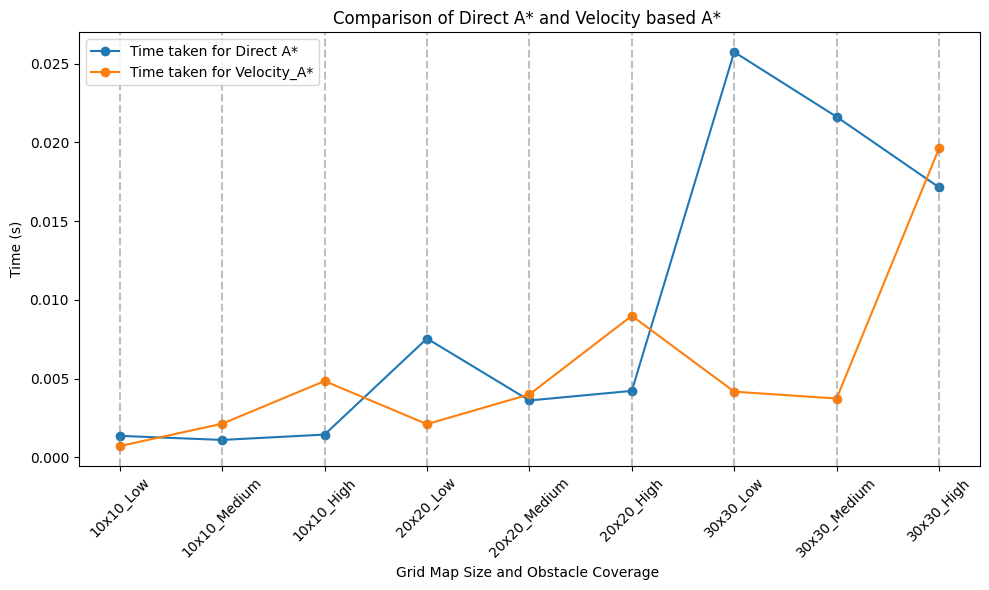

In [14]:

# Reset the index to remove the existing index
combined_df.reset_index(drop=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Direct A* Time
plt.plot(combined_df['Grid_Map'], combined_df['Time taken for Direct A*'], marker='o', label='Time taken for Direct A*')

# Plot Velocity A* Time
plt.plot(combined_df['Grid_Map'], combined_df['Time taken for Velocity_A*'], marker='o', label='Time taken for Velocity_A*')

# Adding labels and title
plt.xlabel('Grid Map Size and Obstacle Coverage ')
plt.ylabel('Time (s)')
plt.title('Comparison of Direct A* and Velocity based A* ')
plt.xticks(rotation=45)
plt.legend()

# Add vertical lines
for x_value in combined_df['Grid_Map']:
    plt.axvline(x=x_value, color='gray', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

